In [3]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
stat=pd.read_csv("charcters_stats.csv")
stat.head()


,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total
0,3-D Man,good,50,31,43,32,25,52,233
1,A-Bomb,good,38,100,17,80,17,64,316
2,Abe Sapien,good,88,14,35,42,35,85,299
3,Abin Sur,good,50,90,53,64,84,65,406
4,Abomination,bad,63,80,53,90,55,95,436


In [8]:
stat.shape

(611, 9)

In [10]:
stat["Alignment"].value_counts()

good       432
bad        165
neutral     11
Name: Alignment, dtype: int64

In [18]:
superhero=stat[stat["Alignment"]=="good"]
superhero.head()

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total
0,3-D Man,good,50,31,43,32,25,52,233
1,A-Bomb,good,38,100,17,80,17,64,316
2,Abe Sapien,good,88,14,35,42,35,85,299
3,Abin Sur,good,50,90,53,64,84,65,406
6,Adam Monroe,good,63,10,12,100,71,64,320


In [21]:
max_speed=superhero.sort_values(by=["Speed"][:5],ascending=False)
max_speed.head()

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total
231,Flash III,good,63,10,100,60,83,32,348
304,Jack of Hearts,good,63,55,100,30,70,30,348
295,Impulse,good,50,10,100,60,63,60,343
525,Stardust,good,88,85,100,110,100,85,568
447,Quicksilver,good,63,28,100,60,57,56,364


In [26]:
min_speed=superhero.sort_values(by=["Speed"],ascending=True)
min_speed.head()

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total
363,Master Brood,good,1,1,1,1,0,1,5
389,Mohinder Suresh,good,1,1,1,1,0,1,5
158,Clea,good,1,1,1,1,0,1,5
392,Monarch,good,1,1,1,1,0,1,5
161,Colin Wagner,good,1,1,1,1,0,1,5


(array([145.,  37.,  89.,  54.,  34.,  31.,  15.,   5.,   6.,  16.]),
 array([  1. ,  10.9,  20.8,  30.7,  40.6,  50.5,  60.4,  70.3,  80.2,
         90.1, 100. ]),
 <BarContainer object of 10 artists>)

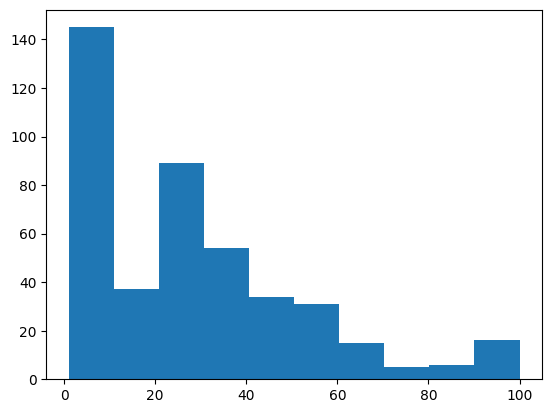

In [28]:
plt.hist(data=min_speed,x="Speed")

In [32]:
max_power=superhero.sort_values(by=["Strength"],ascending=False)
max_power.head()


,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total
537,Superman,good,100,100,100,100,94,85,579
608,Ymir,good,50,100,27,100,83,28,388
491,She-Hulk,good,69,100,42,100,33,70,414
251,Goku,good,56,100,75,90,100,100,521
70,Beyonder,good,88,100,23,100,100,56,467


In [36]:
max_strength=max_power[max_power["Strength"]==100]
max_strength

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total
537,Superman,good,100,100,100,100,94,85,579
608,Ymir,good,50,100,27,100,83,28,388
491,She-Hulk,good,69,100,42,100,33,70,414
251,Goku,good,56,100,75,90,100,100,521
70,Beyonder,good,88,100,23,100,100,56,467
600,Wonder Woman,good,88,100,50,100,42,100,480
599,Wonder Man,good,75,100,53,90,64,64,446
499,Silver Surfer,good,63,100,84,101,100,32,480
138,Captain Marvel,good,100,100,67,95,62,56,480
546,Thor,good,69,100,92,100,100,85,546


In [38]:
max_total=superhero.sort_values(by=["Total"],ascending=False)
max_total

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total
361,Martian Manhunter,good,100,100,96,100,100,85,581
537,Superman,good,100,100,100,100,94,85,579
525,Stardust,good,88,85,100,110,100,85,568
546,Thor,good,69,100,92,100,100,85,546
536,Supergirl,good,94,98,92,100,85,75,544
...,...,...,...,...,...,...,...,...,...
325,Kid Flash II,good,1,1,1,1,0,1,5
166,Crimson Dynamo I,good,1,1,1,1,0,1,5
312,Johann Krauss,good,1,1,1,1,0,1,5
95,Black Widow II,good,1,1,1,1,0,1,5


In [41]:
max_power=max_power[["Name","Total"]]
max_power.head()

,Name,Total
537,Superman,579
608,Ymir,388
491,She-Hulk,414
251,Goku,521
70,Beyonder,467


C:\Users\pavan\AppData\Local\Temp\ipykernel_17548\2229299586.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  plt.bar(max_power['Name'][:5],max_power['Total'][:5],  color = ['red','green','blue','pink','black'])


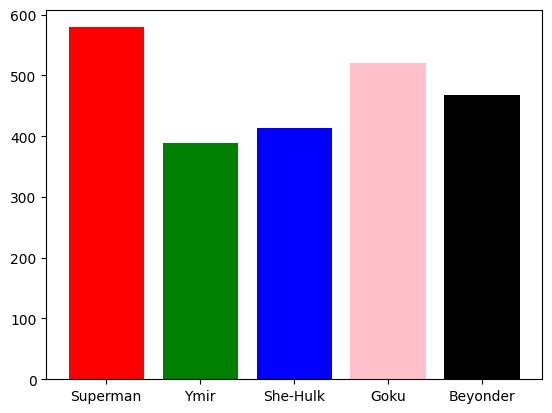

In [62]:
plt.bar(max_power['Name'][:5],max_power['Total'][:5],  color = ['red','green','blue','pink','black'])
plt.show()

In [64]:
supervillian=stat[stat["Alignment"]=='bad']
supervillian.head()

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total
4,Abomination,bad,63,80,53,90,55,95,436
5,Abraxas,bad,88,100,83,99,100,56,526
11,Air-Walker,bad,50,85,100,85,100,40,460
16,Amazo,bad,75,100,100,100,100,100,575
17,Ammo,bad,1,1,1,1,0,1,5


In [68]:
power_sv=supervillian.sort_values(by=['Total'],ascending=False)
power_sv

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total
535,Superboy-Prime,bad,94,100,100,100,100,85,579
242,General Zod,bad,94,100,96,100,94,95,579
16,Amazo,bad,75,100,100,100,100,100,575
203,Dormammu,bad,88,95,83,100,100,80,546
201,Doomsday,bad,88,80,67,120,100,90,545
...,...,...,...,...,...,...,...,...,...
103,Blizzard,bad,1,1,1,1,0,1,5
349,Luke Campbell,bad,1,1,1,1,0,1,5
181,Darkside,bad,1,1,1,1,0,1,5
390,Moloch,bad,1,1,1,1,0,1,5


C:\Users\pavan\AppData\Local\Temp\ipykernel_17548\1475052743.py:2: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  plt.bar(power_sv['Name'][:5],power_sv["Total"][:5],color=['red','blue','green','pink','grey'])


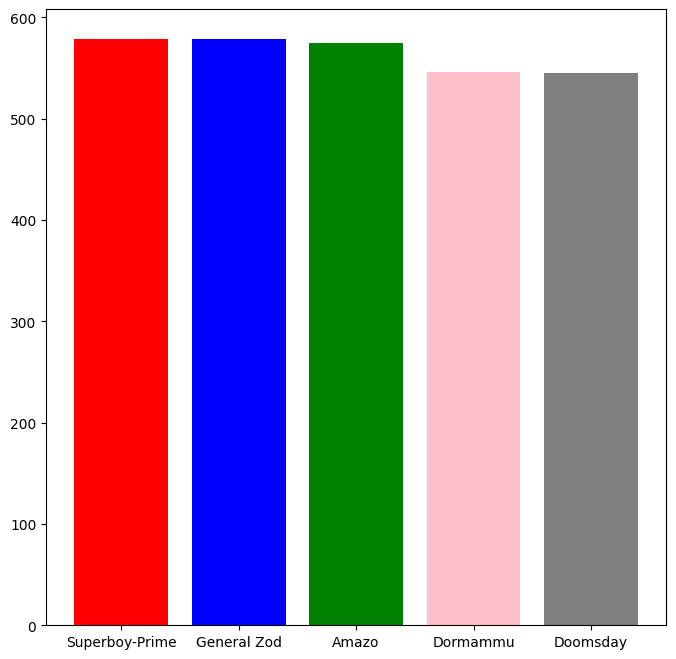

In [72]:

plt.figure(figsize=(8,8))
plt.bar(power_sv['Name'][:5],power_sv["Total"][:5],color=['red','blue','green','pink','grey'])
plt.show()

Text(0.5, 1.0, 'speed of supervillian')

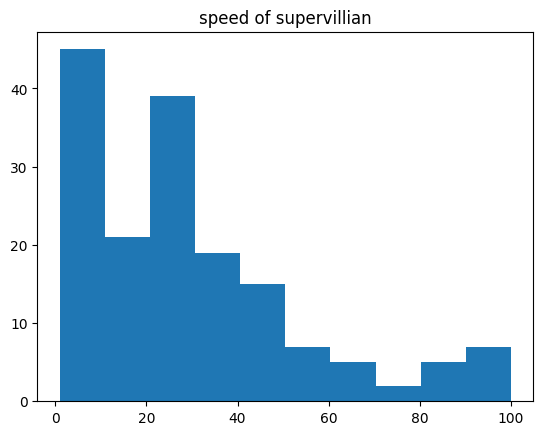

In [75]:
plt.hist(supervillian["Speed"])
plt.title("speed of supervillian")

Text(0.5, 1.0, 'speed of superhero')

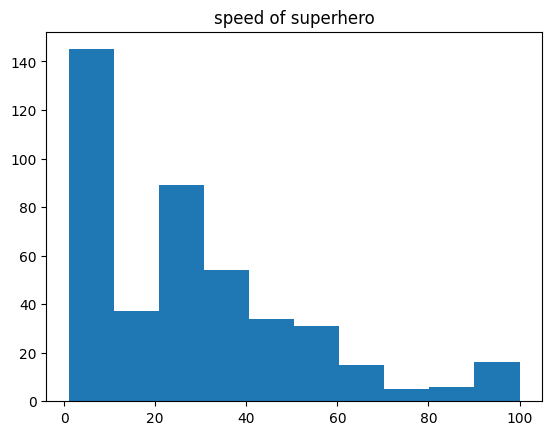

In [77]:
plt.hist(superhero["Speed"])
plt.title("speed of superhero")